In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Bandit():
    '''
    m: True mean
    N: Number of samplings done
    mean: Calculated mean
    '''
    # constructor
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
    
    # random pull 
    def pull(self):
        return np.random.randn()+self.m
    
    # updating mean
    def update(self, x):
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + 1.0/self.N * x

In [3]:
# Experiment to compare three different bandits 
def run_experiment(m1, m2, m3, eps, N):
    '''
    m1, m2, m3: absolute mean of 3 bandits
    eps: probability with which exploration is done
    N: total number of trials
    '''
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    # a new array of length N, without initializing entries
    data = np.empty(N)
    
    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p<eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.title('eps = %f' %eps)
    plt.show()
    
    for b in bandits:
        print(b.mean)
    return cumulative_average           

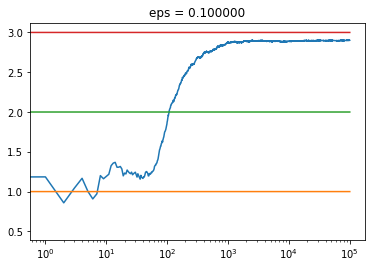

0.9904152779212596
2.0003066744366578
3.0054126152408847


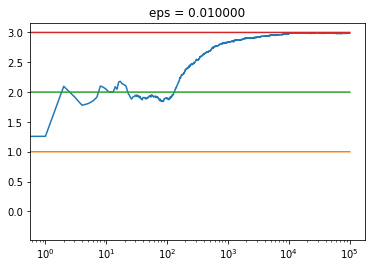

1.0525645722446855
1.9364379868891362
2.9980021693971395


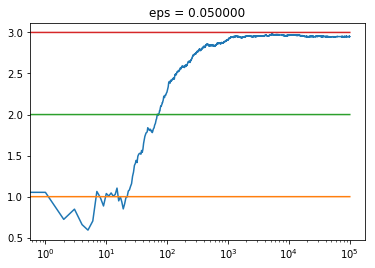

1.0061879815125674
2.0592091161022017
2.999269390569592


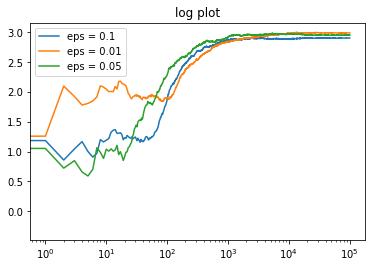

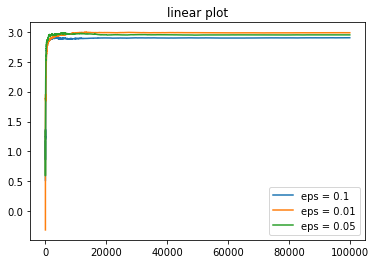

In [4]:
if __name__=='__main__':
    c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
    c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)
    c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
    
    # log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_01, label='eps = 0.01')
    plt.plot(c_05, label='eps = 0.05')
    plt.legend()
    plt.xscale('log')
    plt.title('log plot')
    plt.show()
    
    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_01, label='eps = 0.01')
    plt.plot(c_05, label='eps = 0.05')
    plt.legend()
    plt.title('linear plot')
    plt.show()
    